In [1]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/data/out/lpnet/imagenet100.csv')
df = df.drop(columns='path').join(df['path'].str.split('/', expand=True).iloc[:, 1:])
df.columns = ['metric', 'value', 'step', 'dataset', 'model', 'transform', 'exp_name', 'useless', 'version']

,metric,value,step,dataset,model,transform,exp_name,useless,version
696981,epoch,999.000000,50999.0,data_imagenet100,model_barlow_twins,transform_simclr,barlow_twins_simclr_default,lightning_logs,version_0
655182,hp_metric,-1.000000,0.0,data_imagenet100,model_barlow_twins,transform_simclr,barlow_twins_simclr_default,lightning_logs,version_0
675582,online_train_acc,0.723214,50999.0,data_imagenet100,model_barlow_twins,transform_simclr,barlow_twins_simclr_default,lightning_logs,version_0
685782,online_train_loss,1.120676,50999.0,data_imagenet100,model_barlow_twins,transform_simclr,barlow_twins_simclr_default,lightning_logs,version_0
698982,online_val_acc,0.730406,50999.0,data_imagenet100,model_barlow_twins,transform_simclr,barlow_twins_simclr_default,lightning_logs,version_0
699982,online_val_loss,1.023529,50999.0,data_imagenet100,model_barlow_twins,transform_simclr,barlow_twins_simclr_default,lightning_logs,version_0
665382,train_loss,4281.468750,50999.0,data_imagenet100,model_barlow_twins,transform_simclr,barlow_twins_simclr_default,lightning_logs,version_0
697982,val_loss,5187.386230,50999.0,data_imagenet100,model_barlow_twins,transform_simclr,barlow_twins_simclr_default,lightning_logs,version_0
652180,epoch,999.000000,50999.0,data_imagenet100,model_barlow_twins,transform_simclr,barlow_twins_simclr_lp,lightning_logs,version_0
610381,hp_metric,-1.000000,0.0,data_imagenet100,model_barlow_twins,transform_simclr,barlow_twins_simclr_lp,lightning_logs,version_0


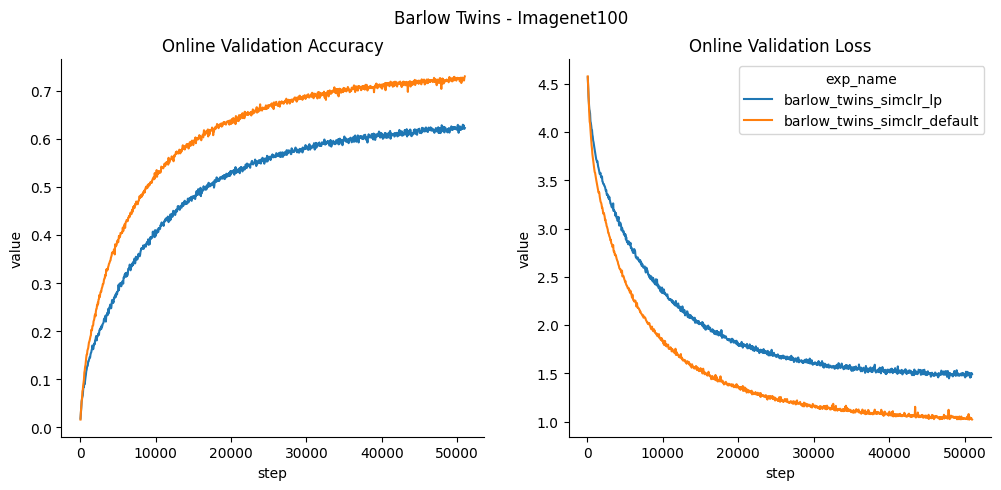

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5), dpi=100)

fig.suptitle('Barlow Twins - Imagenet100')

ax = sns.lineplot(
    df[df.metric == 'online_val_acc'][lambda x: ( 
        (x.exp_name == 'barlow_twins_simclr_lp') | 
        (x.exp_name == 'barlow_twins_custom_lp') | 
        (x.exp_name == 'barlow_twins_custom_default') | 
        (x.exp_name == 'barlow_twins_simclr_default')
    )],
    x='step',
    y='value',
    hue='exp_name',
    ax = ax1
)

ax.set_title('Online Validation Accuracy')
ax.legend().remove()

sns.despine()

ax = sns.lineplot(
    df[df.metric == 'online_val_loss'][lambda x: ( 
        (x.exp_name == 'barlow_twins_simclr_lp') | 
        (x.exp_name == 'barlow_twins_custom_lp') | 
        (x.exp_name == 'barlow_twins_custom_default') | 
        (x.exp_name == 'barlow_twins_simclr_default')
    )],
    x='step',
    y='value',
    hue='exp_name',
    ax=ax2
)

ax.set_title('Online Validation Loss')
sns.despine()


df.loc[df[lambda x: ( 
        (x.exp_name == 'barlow_twins_simclr_lp') | 
        (x.exp_name == 'barlow_twins_custom_lp') | 
        (x.exp_name == 'barlow_twins_custom_default') | 
        (x.exp_name == 'barlow_twins_simclr_default')
    )].groupby(['exp_name', 'metric', ]).step.idxmax()]

,metric,value,step,dataset,model,transform,exp_name,useless,version
941955,epoch,636.000000,32449.0,data_imagenet100,model_simclr,transform_simclr,simclr_simclr_default,lightning_logs,version_0
911318,hp_metric,-1.000000,0.0,data_imagenet100,model_simclr,transform_simclr,simclr_simclr_default,lightning_logs,version_1
928339,online_train_acc,0.628906,32449.0,data_imagenet100,model_simclr,transform_simclr,simclr_simclr_default,lightning_logs,version_0
934829,online_train_loss,1.368482,32449.0,data_imagenet100,model_simclr,transform_simclr,simclr_simclr_default,lightning_logs,version_0
943227,online_val_acc,0.668603,32435.0,data_imagenet100,model_simclr,transform_simclr,simclr_simclr_default,lightning_logs,version_0
943863,online_val_loss,1.227531,32435.0,data_imagenet100,model_simclr,transform_simclr,simclr_simclr_default,lightning_logs,version_0
921849,train_loss,1.981766,32449.0,data_imagenet100,model_simclr,transform_simclr,simclr_simclr_default,lightning_logs,version_0
942591,val_loss,2.453766,32435.0,data_imagenet100,model_simclr,transform_simclr,simclr_simclr_default,lightning_logs,version_0
818714,epoch,999.000000,50999.0,data_imagenet100,model_simclr,transform_simclr,simclr_simclr_lp,lightning_logs,version_0
776915,hp_metric,-1.000000,0.0,data_imagenet100,model_simclr,transform_simclr,simclr_simclr_lp,lightning_logs,version_0


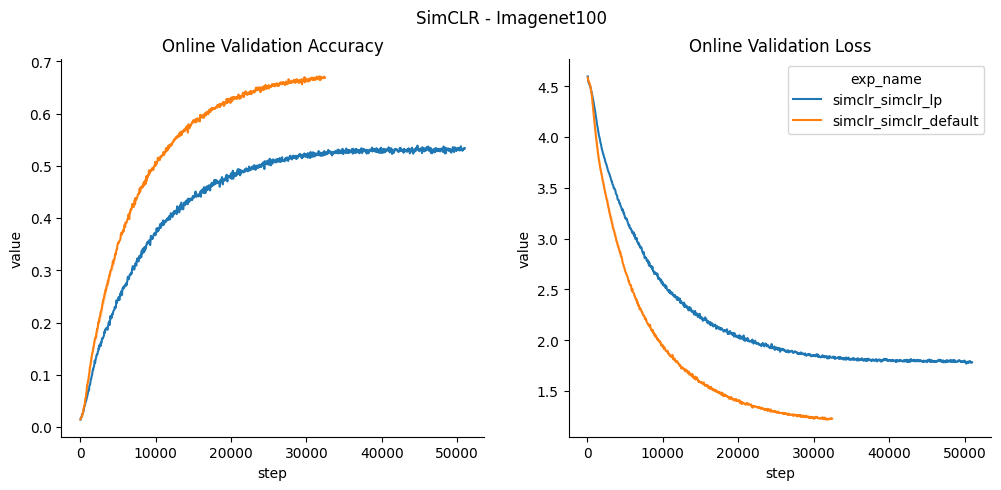

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5), dpi=100)

fig.suptitle('SimCLR - Imagenet100')

ax = sns.lineplot(
    df[df.metric == 'online_val_acc'][lambda x: ( 
        (x.exp_name == 'simclr_simclr_lp') | 
        (x.exp_name == 'simclr_custom_lp') | 
        (x.exp_name == 'simclr_custom_default') | 
        (x.exp_name == 'simclr_simclr_default')
    )],
    x='step',
    y='value',
    hue='exp_name',
    ax = ax1
)

ax.set_title('Online Validation Accuracy')
ax.legend().remove()

sns.despine()

ax = sns.lineplot(
    df[df.metric == 'online_val_loss'][lambda x: ( 
        (x.exp_name == 'simclr_simclr_lp') | 
        (x.exp_name == 'simclr_custom_lp') | 
        (x.exp_name == 'simclr_custom_default') | 
        (x.exp_name == 'simclr_simclr_default')
    )],
    x='step',
    y='value',
    hue='exp_name',
    ax=ax2
)

ax.set_title('Online Validation Loss')
sns.despine()



df.loc[df[lambda x: ( 
        (x.exp_name == 'simclr_simclr_lp') | 
        (x.exp_name == 'simclr_custom_lp') | 
        (x.exp_name == 'simclr_custom_default') | 
        (x.exp_name == 'simclr_simclr_default')
)].groupby(['exp_name', 'metric', ]).step.idxmax()]

,metric,value,step,dataset,model,transform,exp_name,useless,version
1034734,epoch,0.000000,124.0,data_imagenet100,model_simclr,transform_hemisphere,simclr_hemisphere_default,lightning_logs,version_2
1031632,epoch,999.000000,50999.0,data_imagenet100,model_simclr,transform_hemisphere,simclr_hemisphere_default,lightning_logs,version_3
986830,epoch,999.000000,50999.0,data_imagenet100,model_simclr,transform_hemisphere,simclr_hemisphere_default,lightning_logs,version_4
989832,hp_metric,-1.000000,0.0,data_imagenet100,model_simclr,transform_hemisphere,simclr_hemisphere_default,lightning_logs,version_0
945030,hp_metric,-1.000000,0.0,data_imagenet100,model_simclr,transform_hemisphere,simclr_hemisphere_default,lightning_logs,version_1
1034634,hp_metric,-1.000000,0.0,data_imagenet100,model_simclr,transform_hemisphere,simclr_hemisphere_default,lightning_logs,version_2
989833,hp_metric,-1.000000,0.0,data_imagenet100,model_simclr,transform_hemisphere,simclr_hemisphere_default,lightning_logs,version_3
945031,hp_metric,-1.000000,0.0,data_imagenet100,model_simclr,transform_hemisphere,simclr_hemisphere_default,lightning_logs,version_4
1034684,online_train_acc,0.000000,124.0,data_imagenet100,model_simclr,transform_hemisphere,simclr_hemisphere_default,lightning_logs,version_2
1010233,online_train_acc,0.089286,50999.0,data_imagenet100,model_simclr,transform_hemisphere,simclr_hemisphere_default,lightning_logs,version_3


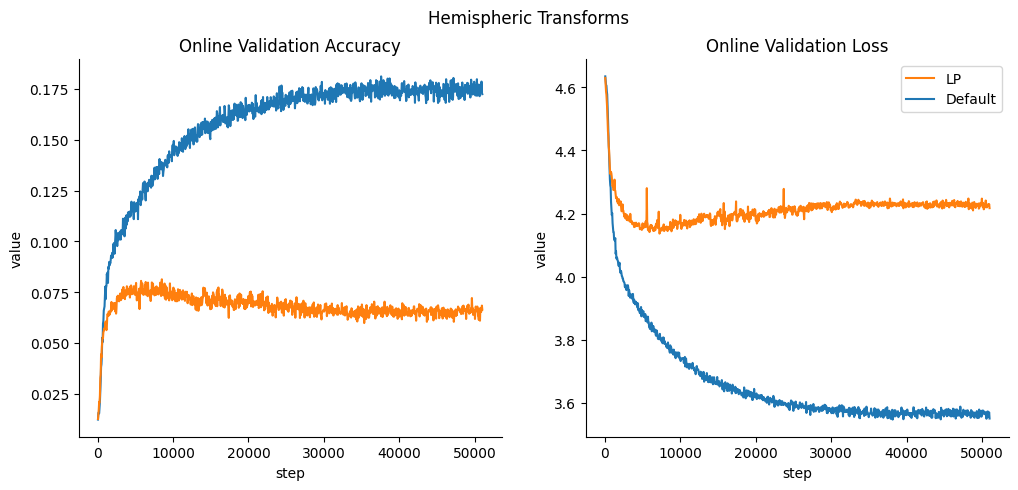

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5), dpi=100)

fig.suptitle('Hemispheric Transforms')

ax = sns.lineplot(
    df[lambda x: ( 
        (x.exp_name == 'simclr_hemisphere_default') | 
        # (x.exp_name == 'simclr_hemisphere_lp') |
        False
    )][lambda x: x.metric == 'online_val_acc'],
    x='step',
    y='value',
    hue='version',
    ax = ax1
)

ax.set_title('Online Validation Accuracy')
ax.legend().remove()

sns.despine()

ax = sns.lineplot(
    df[lambda x: ( 
        (x.exp_name == 'simclr_hemisphere_default') | 
        # (x.exp_name == 'simclr_hemisphere_lp') |
        False
    )][lambda x: x.metric == 'online_val_loss'],
    x='step',
    y='value',
    hue='version',
    ax=ax2
)

ax.set_title('Online Validation Loss')
sns.despine()
ax.legend(handles=[ax.lines[3], ax.lines[0]], labels=['LP', 'Default'])


df.loc[df[lambda x: ( 
        (x.exp_name == 'simclr_hemisphere_default') | 
        # (x.exp_name == 'simclr_hemisphere_lp') |
        False
    )].groupby(['exp_name', 'metric', 'version']).step.idxmax()]

,metric,value,step,dataset,model,transform,exp_name,useless,version
585601,epoch,35.000000,14543.0,data_imagenet100,model_siamese_net,transform_custom,siamesenet_custom_default_repeat8_margin100,lightning_logs,version_1
568117,hp_metric,24.942715,14543.0,data_imagenet100,model_siamese_net,transform_custom,siamesenet_custom_default_repeat8_margin100,lightning_logs,version_1
571025,loss/train,22.685257,14539.0,data_imagenet100,model_siamese_net,transform_custom,siamesenet_custom_default_repeat8_margin100,lightning_logs,version_1
587437,loss/val,25.323299,1835.0,data_imagenet100,model_siamese_net,transform_custom,siamesenet_custom_default_repeat8_margin100,lightning_logs,version_1
576841,neg_distance/train,103.950150,14539.0,data_imagenet100,model_siamese_net,transform_custom,siamesenet_custom_default_repeat8_margin100,lightning_logs,version_1
591109,neg_distance/val,86.891815,1835.0,data_imagenet100,model_siamese_net,transform_custom,siamesenet_custom_default_repeat8_margin100,lightning_logs,version_1
579749,online_train_acc,0.250000,14539.0,data_imagenet100,model_siamese_net,transform_custom,siamesenet_custom_default_repeat8_margin100,lightning_logs,version_1
582657,online_train_loss,3.448147,14539.0,data_imagenet100,model_siamese_net,transform_custom,siamesenet_custom_default_repeat8_margin100,lightning_logs,version_1
591181,online_val_acc,0.288414,14543.0,data_imagenet100,model_siamese_net,transform_custom,siamesenet_custom_default_repeat8_margin100,lightning_logs,version_1
591217,online_val_loss,2.822368,14543.0,data_imagenet100,model_siamese_net,transform_custom,siamesenet_custom_default_repeat8_margin100,lightning_logs,version_1


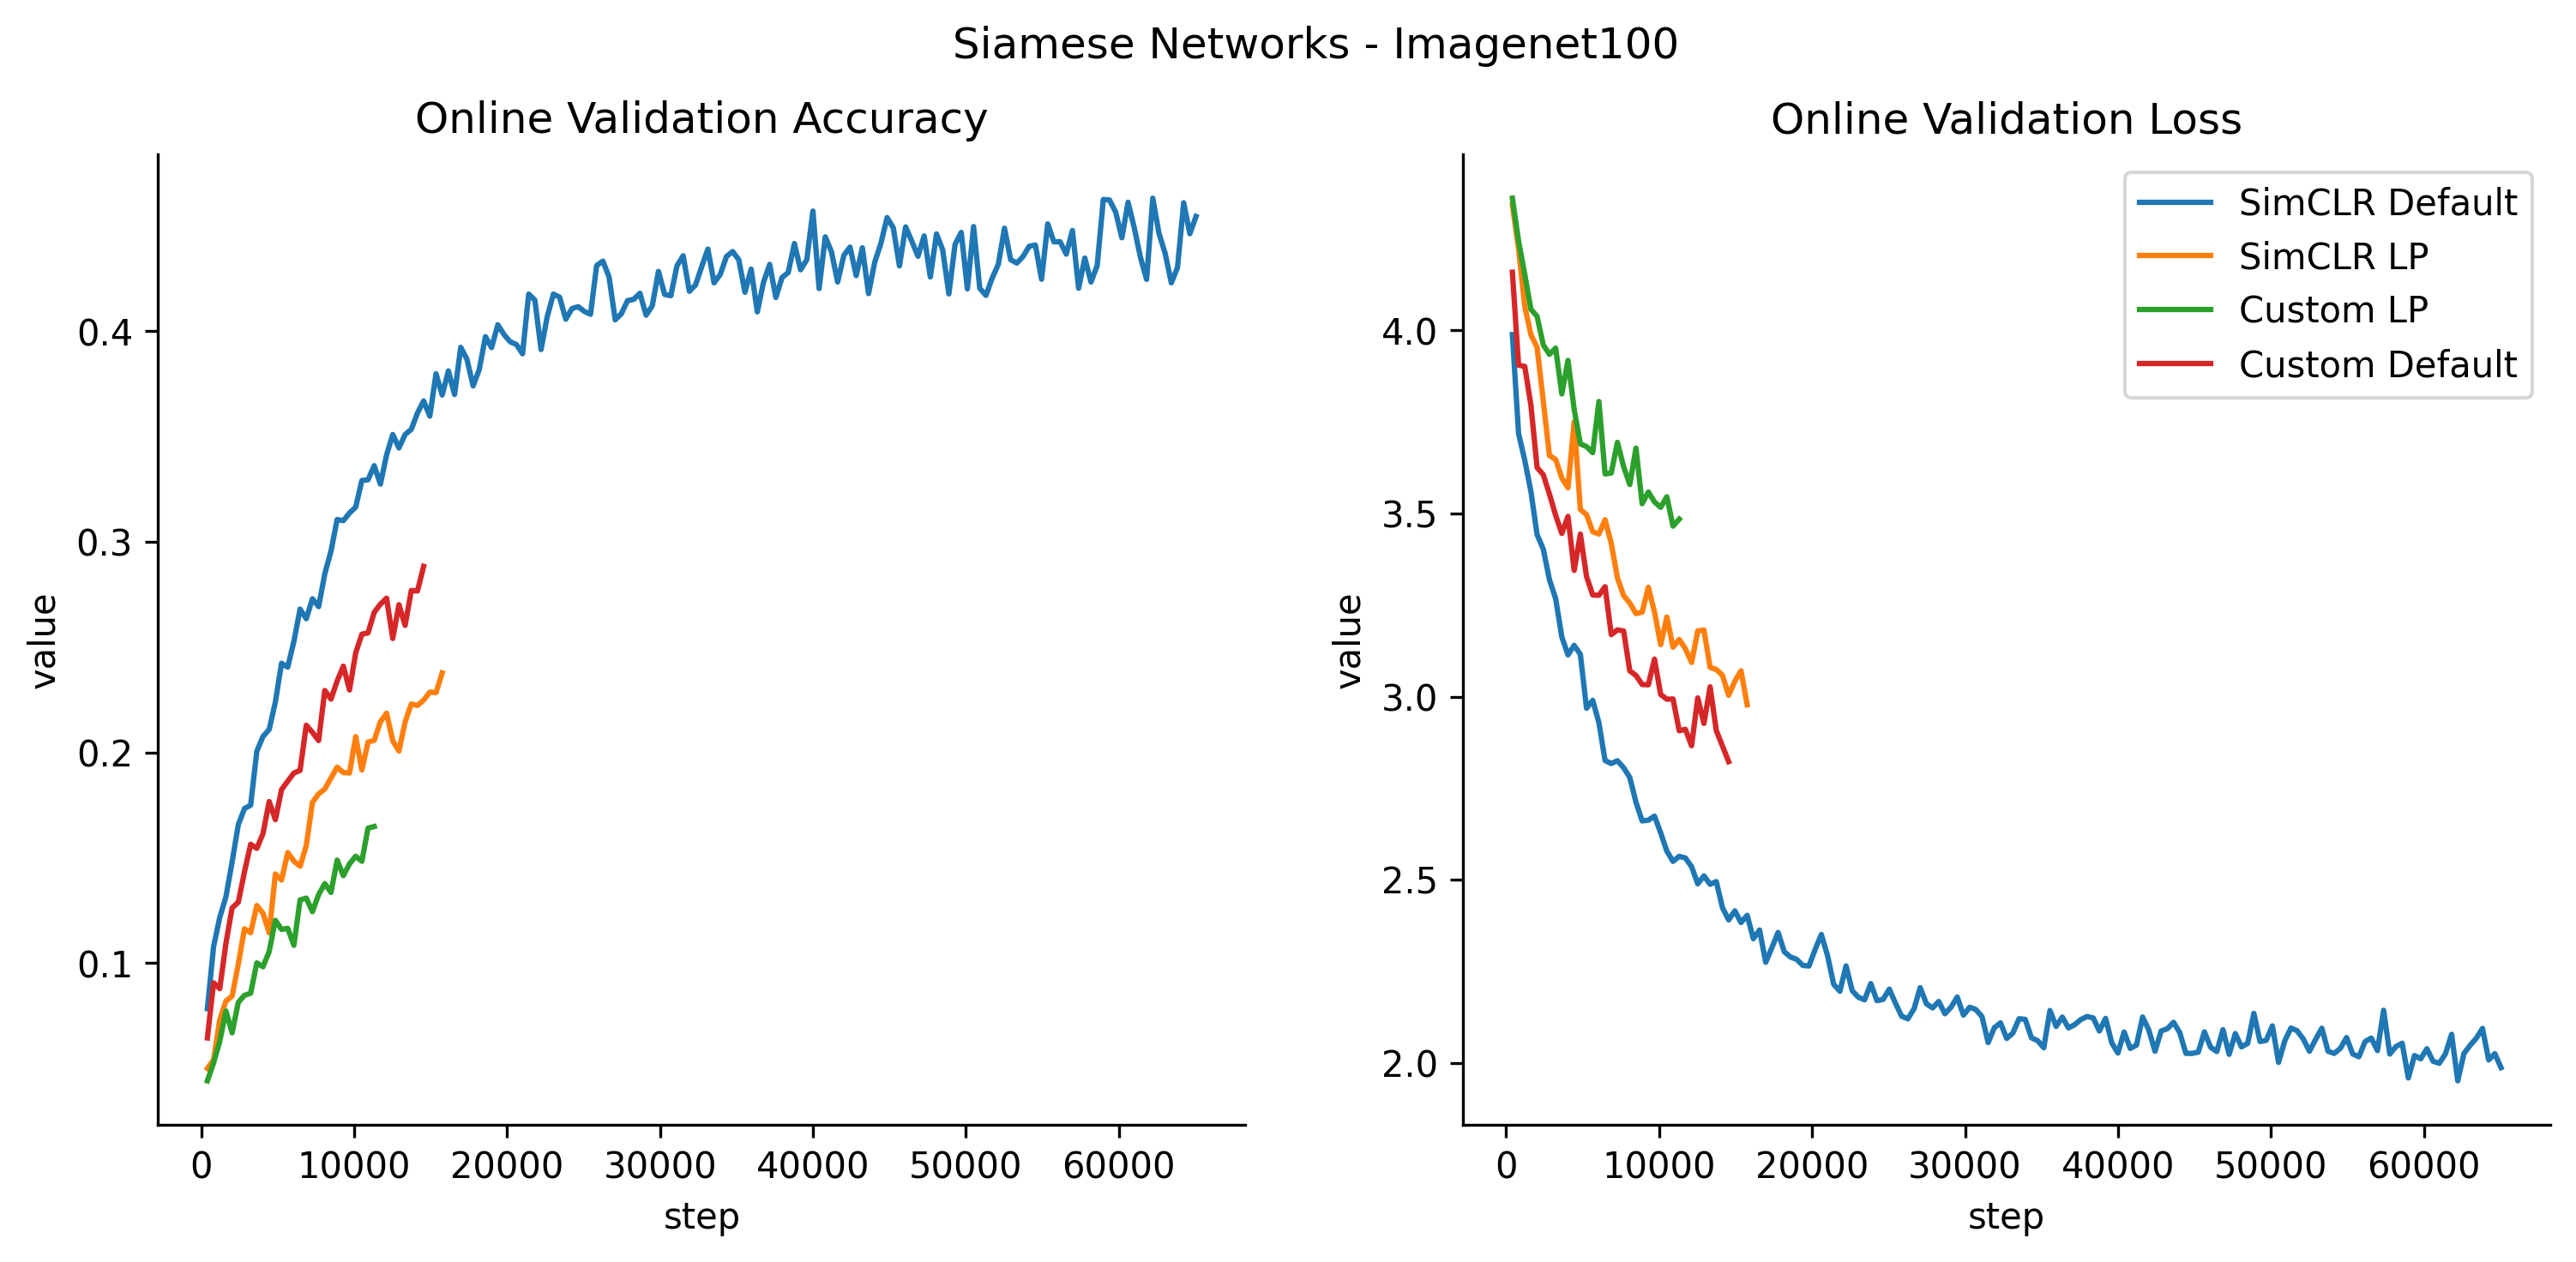

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5), dpi=300)

fig.suptitle('Siamese Networks - Imagenet100')

ax = sns.lineplot(
    df[lambda x: ( 
        ((x.exp_name == 'siamesenet_simclr_default_repeat8_margin100') & (x.version == 'version_5')) | 
        ((x.exp_name == 'siamesenet_simclr_lp_repeat8_margin100') & (x.version == 'version_12') ) | 
        ((x.exp_name == 'siamesenet_custom_lp_repeat8_margin100') & (x.version == 'version_1') )| 
        ((x.exp_name == 'siamesenet_custom_default_repeat8_margin100') & (x.version == 'version_1') ) | 
        False
    )][lambda x: x.metric == 'online_val_acc'],
    x='step',
    y='value',
    hue='exp_name',
    ax = ax1
)

ax.set_title('Online Validation Accuracy')
ax.legend().remove()

sns.despine()

ax = sns.lineplot(
    df[lambda x: ( 
        ((x.exp_name == 'siamesenet_simclr_default_repeat8_margin100') & (x.version == 'version_5')) | 
        ((x.exp_name == 'siamesenet_simclr_lp_repeat8_margin100') & (x.version == 'version_12') ) | 
        ((x.exp_name == 'siamesenet_custom_lp_repeat8_margin100') & (x.version == 'version_1') )| 
        ((x.exp_name == 'siamesenet_custom_default_repeat8_margin100') & (x.version == 'version_1') ) | 
        False
    )][lambda x: x.metric == 'online_val_loss'],
    x='step',
    y='value',
    hue='exp_name',
    ax=ax2
)

ax.set_title('Online Validation Loss')
sns.despine()
ax.legend(handles=[ax.lines[0], ax.lines[1], ax.lines[2], ax.lines[3]], labels=['SimCLR Default', 'SimCLR LP', 'Custom LP', 'Custom Default'])


df.loc[df[lambda x: ( 
        ((x.exp_name == 'siamesenet_simclr_default_repeat8_margin100') & (x.version == 'version_5')) | 
        ((x.exp_name == 'siamesenet_simclr_lp_repeat8_margin100') & (x.version == 'version_12') ) | 
        ((x.exp_name == 'siamesenet_custom_lp_repeat8_margin100') & (x.version == 'version_1') )| 
        ((x.exp_name == 'siamesenet_custom_default_repeat8_margin100') & (x.version == 'version_1') ) | 
        False
    )].groupby(['exp_name', 'metric', ]).step.idxmax()]